# No-show appointment Analysis

## Here's the Dataset <a href="https://www.kaggle.com/joniarroba/noshowappointments">Link</a>

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 

### Getting to know the columns:

<ul>
<li>PatientId: Identification of a patient.</li>
<li>AppointmentID: Identification of each appointment.</li>
<li>Gender: Male or Female</li>
<li>ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.</li>
<li>AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.</li>
<li>Age: How old is the patient.</li>
<li>Neighbourhood: Where the appointment takes place.</li>
<li>Scholarship: Indicates whether or not the patient is enrolled in Brasilian welfare program <a href='https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia'>Bolsa Família</a>.</li>
<li>Hipertension: True or False</li>
<li>Diabetes: True or False</li>
<li>Alcoholism: True or False</li>
<li>Handcap: True or False</li>
<li>SMS_received: True or False</li>
<li>No-show: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>

### Research Questions:

Q1. Were the amount of people who received SMS compared to those who didn't, showed up more or not?

Q2. What percentage of people showed up for appointment as per age group?

Q3. Does the difference between the scheduled time & appointment time in terms of days is affecting whether a patient showed up or not?

In [1]:
# import & other statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('darkgrid')
pd.options.mode.chained_assignment = None

In [2]:
# Creation of a function (to be used while plotting bar graph)
def bar_plot_func(location, height, title, xlabel, ylabel):
    plt.bar(location, height)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    return 0

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Data is loaded and few lines are printed.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Column Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Statistical Properties
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


So there are 110527 rows and none of the columns are missing any entries. The data looks mostly clean, moving on to the next section.

### Data Cleaning 

Here's what's going on in this section:
<ul>
<li>Change of datatype from 'string' to 'datetime64' for ScheduledDay & AppointmentDay column.</li>
<li>Handling the negative age, since that is not realistic.</li>
<li>Handling any duplicate rows.</li>
<li>Dropping of non-required columns for this particular analysis.</li>
<li>Renaming all the columns into lowercase.</li>
<li>Changing the name & entries of 'no-show' column to numerics for efficient analysis.</li>
</ul>

In [6]:
# Change of datatype from 'string' to 'datetime64' for ScheduledDay & AppointmentDay column.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [7]:
# Dropping the rows with negative age(s)
df = df.query('Age >= 0')

In [8]:
# Handling the duplicate rows
df.duplicated().sum()

0

No duplicate row(s) found.

In [9]:
# Dropping of non-required columns for this particular analysis.
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

The distance from the home to neighbourhood hospital is not present which is a data limitation and hence the 'Neighbourhood' is dropped.

In [10]:
# Mapping of the lowering function to all the column names
df.columns = map(str.lower, df.columns)

In [11]:
# Changing the name 'no-show' column & checking for unique values.
df.rename(columns = {'no-show' : 'showed_up'}, inplace = True)
df['showed_up'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# Changing the entries of 'no-show' column to numerics for efficient analysis.
df.showed_up.replace(to_replace=['No', 'Yes'], value=[1, 0], inplace = True)

Time to print dataset properties all over again using DataFrames functions.

In [13]:
df.head(10)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,1
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,1
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,0
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,0
8,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,0,0,0,0,0,0,1
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,1


In [14]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110526 non-null  object             
 1   scheduledday    110526 non-null  datetime64[ns, UTC]
 2   appointmentday  110526 non-null  datetime64[ns, UTC]
 3   age             110526 non-null  int64              
 4   scholarship     110526 non-null  int64              
 5   hipertension    110526 non-null  int64              
 6   diabetes        110526 non-null  int64              
 7   alcoholism      110526 non-null  int64              
 8   handcap         110526 non-null  int64              
 9   sms_received    110526 non-null  int64              
 10  showed_up       110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(8), object(1)
memory usage: 10.1+ MB


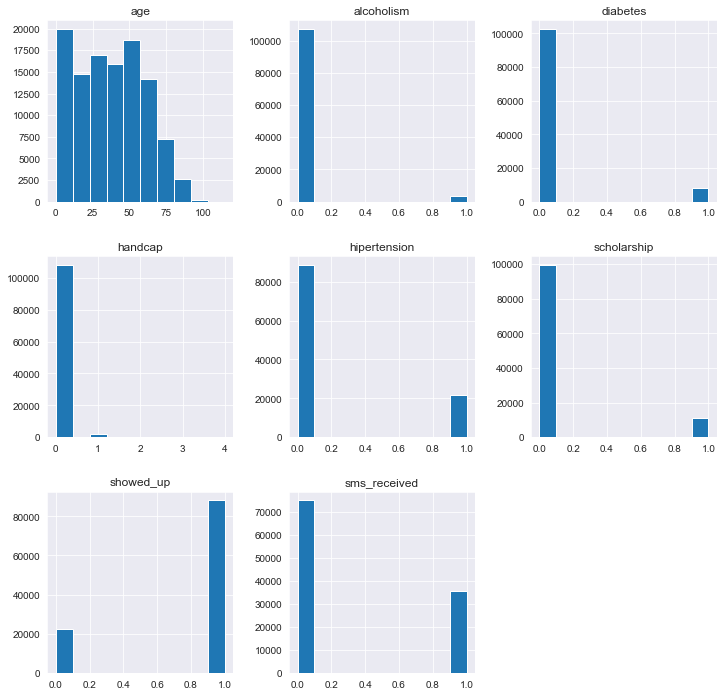

In [16]:
# Simple histogram plot.
df.hist(figsize = (12, 12));

<a id='eda'></a>
## Exploratory Data Analysis

The dependent variable in my case is 'showed_up' & the three independent variable that I will be working on are 'sms_received', 'age' & lastly, the difference between 'appointmentday' and 'scheduledday'.

### Q1. Were the amount of people who received SMS compared to those who didn't, showed up more or not?

In [17]:
# Checking for how many entries received a SMS.
df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

In [18]:
# Dividing the data based on above observation.
df_sms_r = df.query('sms_received == 1')
df_sms_nr = df.query('sms_received == 0')

In [19]:
# Calculating the mean of people who received an SMS & showed up for the appointment.
show_sms_mean = df_sms_r.showed_up.mean()
show_sms_mean

0.7242545516036301

In [20]:
# Calculating the mean of people who didn't receive an SMS & still showed up for the appointment.
no_show_sms_mean = df_sms_nr.showed_up.mean()
no_show_sms_mean

0.8329646607323703

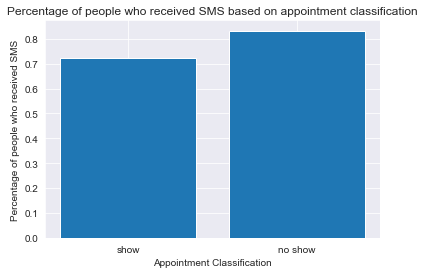

In [21]:
# Creating a bar chart with proper labels.
# Defining the variables to plot
loc_sms = ["show", "no show"]
height_sms = [show_sms_mean, no_show_sms_mean]
title_sms = "Percentage of people who received SMS based on appointment classification"
xlabel_sms = "Appointment Classification"
ylabel_sms = "Percentage of people who received SMS"

# Calling the bar plot function
bar_plot_func(loc_sms, height_sms, title_sms, xlabel_sms, ylabel_sms);

It is really interesting to see that from the amount people who received an SMS, less percentage of people showed up for the appointment compared those who didn't. Hence, the inference that can be taken from here is that, less resources can be spend on sending SMS to patients. 

The limitation here was that on which day between the Scheduled date & Appointment date the SMS was sent is not present. That would really help on looking out the efficiency of SMS sent with respect to appointments.

### Q2. What percentage of people showed up for appointment as per age group?

To approach this question, the age is classified into 4 categories:

<ul>
<li>0 - 2: Baby</li>
<li>3 - 12: Child</li>
<li>13 - 18: Adolescence</li>
<li>19 - 60: Adult</li>
<li>61+: Old Adult</li>
</ul>

In [22]:
# Getting to know the maximum age in dataset.
df.age.max()

115

In [23]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0, 2, 12, 18, 60, 115]

In [24]:
# Labels for the four acidity level groups
bin_names = ['Baby', 'Child', 'Adolescence', 'Adult', 'Old Adult']

In [25]:
# Creates age_group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names, include_lowest=True)

# Checks for successful creation of this column
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,1,Old Adult
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,1,Adult
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,1,Old Adult
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,1,Child
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,1,Adult


In [26]:
# Used groupby to get the mean (percentile) appointment show up for each age group.
age_showed_up_means = df.groupby('age_group')['showed_up'].mean()
age_showed_up_means

age_group
Baby           0.824226
Child          0.779436
Adolescence    0.739464
Adult          0.790526
Old Adult      0.847890
Name: showed_up, dtype: float64

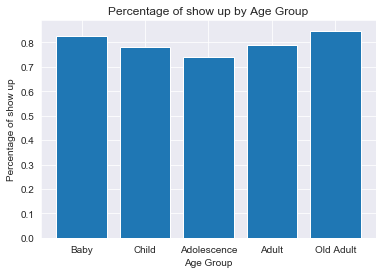

In [27]:
# Creating a bar chart with proper labels.
# Defining the variables to plot.
loc_age = ['Baby', 'Child', 'Adolescence', 'Adult', 'Old Adult']
height_age = age_showed_up_means
title_age = 'Percentage of show up by Age Group'
xlabel_age = 'Age Group'
ylabel_age = 'Percentage of show up'

# Calling the bar plot function.
bar_plot_func(loc_age, height_age, title_age, xlabel_age, ylabel_age);

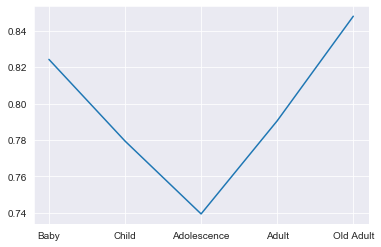

In [28]:
# FOR CURIOSITY: Line Plot
plt.plot(loc_age, height_age);

The inference from this question is clear from the plots that the least percentage of patients who show up falls inder the adolescent group. Hence parental supervision on this group is a must for a healthy neighborhood.

The limitation that comes under this question is that whether the younger people were accompanied with guardians or not, is not mentioned.

### Q3. Difference between the scheduled time & appointment time in terms of days affecting whether a showed up or not.

In [29]:
# Normalize the dates
df['scheduledday'] = df.scheduledday.dt.normalize()
df['appointmentday'] = df.appointmentday.dt.normalize()

In [30]:
# Calculating the difference between two dates in a new column
df['diff_days'] = df['appointmentday'] - df['scheduledday']

# Convert the difference in terms of days
df['diff_days'] = df['diff_days'] / np.timedelta64(1, 'D')

In [31]:
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,age_group,diff_days
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,1,Old Adult,0.0
1,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,1,Adult,0.0
2,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,1,Old Adult,0.0
3,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,1,Child,0.0
4,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,1,Adult,0.0


In [32]:
# Segrating based on whether a person showed up or not.
show = df.showed_up == 1
no_show = df.showed_up == 0

In [33]:
# 
show_days_mean = df.diff_days[show].mean()
show_days_mean

8.754758692620767

In [34]:
#
no_show_days_mean = df.diff_days[no_show].mean()
no_show_days_mean

15.83148886598862

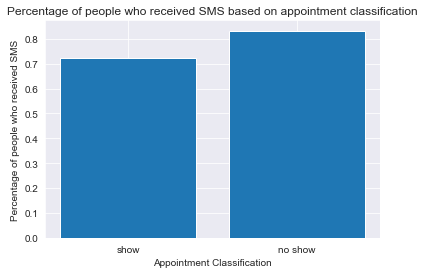

In [35]:
# Plotting the above observations in a bar graph.
# Defining the variables to plot
loc_day = ["show", "no show"]
height_day = [show_days_mean, no_show_days_mean]
title_day = "Mean of Difference between the scheduled time & appointment time in days"
xlabel_day = "Appointment Classification"
ylabel_day = "Mean of difference in days"

# Calling the bar plot function
bar_plot_func(loc_sms, height_sms, title_sms, xlabel_sms, ylabel_sms);

Here the inference is that, the number of people who showed up have less mean difference between the scheduled time & appointment in days, compared to the people who didn't show up because they have more mean difference between the scheduled time & appointment time in days.

<a id='conclusions'></a>
## Conclusions

Based on the questions stated above, these are the final conclusions.

<ul>
<li>Less resources to be spend on SMS.</li>
<li>Adult supervision required for the adolescents age group. </li>
<li>Less time gap to be given between scheduled & appointment date.</li>
</ul>